In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
import seaborn as sns
import datetime as dt
from datetime import datetime

In [6]:
df = pd.read_csv('data/master_data_with_sequel.csv')

In [ ]:
df['director'] = 

In [88]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [89]:
df1 = df[['budget','is_sequel','domestic_opening_sales','release_date']]

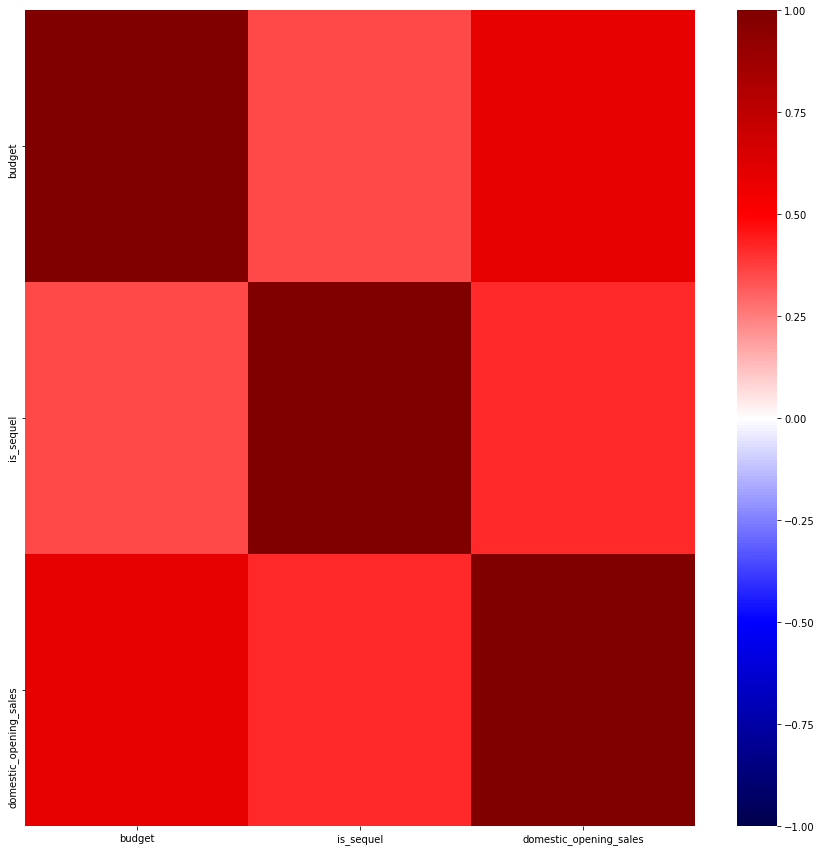

In [90]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df1.corr(), cmap="seismic", vmin=-1, vmax=1, ax=ax);

<ipython-input-91-c8ef9a649a47>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(df1[df1.columns[0:]], ax=ax);


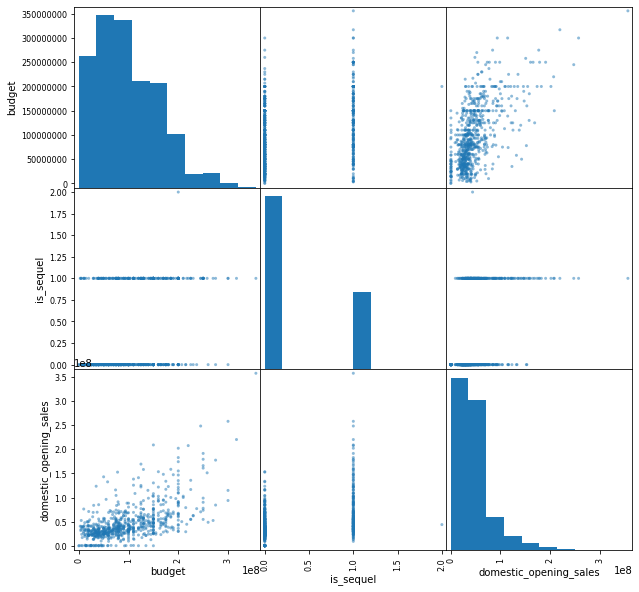

In [91]:
fig, ax = plt.subplots(figsize=(10, 10))
pd.plotting.scatter_matrix(df1[df1.columns[0:]], ax=ax);

In [109]:
x = df[['budget','dd_top5','is_sequel','release_date']]

y = df['domestic_opening_sales']

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.2, random_state=5)
#previous random state 10

In [110]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=.25, random_state=10)
#Previous random state 3

In [117]:
x_train['release_date']= x_train['release_date'].map(dt.datetime.toordinal)
x_val['release_date']= x_val['release_date'].map(dt.datetime.toordinal)

Text(0.5, 1.0, 'Budget versus domestic opening sales top movies from 2000 to 2020')

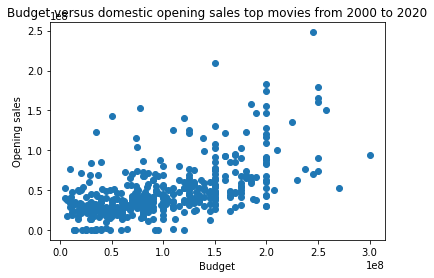

In [94]:
#fig, ax = plt.subplots(figsize=(9, 7))

budget_x = x_train['budget']
sales_y = y_train

plt.scatter(budget_x, sales_y)
plt.xlabel('Budget')
plt.ylabel('Opening sales')
plt.title('Budget versus domestic opening sales top movies from 2000 to 2020')

In [118]:
x_budget_train = x_train[['budget']]
x_budget_val = x_val[['budget']]
x_budget_test = x_test[['budget']]

In [119]:
#x_train_df = pd.DataFrame(x_train, index=x_train.index)
#x_val_df = pd.DataFrame(x_val, index=x_val.index)
#x_test_df = pd.DataFrame(x_val, index=x_test.index)

In [120]:
#scaler = StandardScaler()

#x_train_scaled = scaler.fit_transform(x_train.values)
#x_val_scaled = scaler.transform(x_val.values)
#x_test_scaled = scaler.transform(x_test.values)

In [121]:
b_lr = LinearRegression()

b_lr.fit(x_budget_train, y_train)

b_lr.score(x_budget_val, y_val) #R2

y_pred = b_lr.predict(x_budget_val)
np.sqrt(mean_squared_error(y_val, y_pred))

35543294.828940324

In [122]:
b_lr.score(x_budget_val, y_val) #R2

0.4238464519853321

In [123]:
b_lr.intercept_

16333629.904164758

In [124]:
x_sequel_train = x_train[['is_sequel']]
x_sequel_val = x_val[['is_sequel']]
x_sequel_test = x_test[['is_sequel']]

In [125]:
seq_lr = LinearRegression()

seq_lr.fit(x_sequel_train, y_train)

seq_lr.score(x_sequel_val, y_val) #R2

y_pred = seq_lr.predict(x_sequel_val)
np.sqrt(mean_squared_error(y_val, y_pred))

43318553.412436575

In [126]:
seq_lr.score(x_sequel_val, y_val)

0.14420299314030882

In [134]:
seq_lr.score(x_sequel_test, y_test) #R2

y_pred = seq_lr.predict(x_sequel_test)
np.sqrt(mean_squared_error(y_test, y_pred))

31369844.233847156

In [135]:
seq_lr.score(x_sequel_test, y_test)

0.22590891717298378

In [127]:
combined_train_df = pd.concat([x_budget_train, x_sequel_train], axis=1)

combined_val_df = pd.concat([x_budget_val, x_sequel_val], axis=1)
combined_val_df.head()

,budget,is_sequel
96,60000000,0
377,217000000,1
137,90000000,1
6,220000000,1
18,160000000,0


In [128]:
combo_lr = LinearRegression()

combo_lr.fit(combined_train_df, y_train)

combo_lr.score(combined_val_df, y_val) #R2

y_pred = combo_lr.predict(combined_val_df)
np.sqrt(mean_squared_error(y_val, y_pred))

34887607.47727439

In [129]:
combo_lr.score(combined_val_df, y_val) #R2


0.44490764319624065

In [130]:
x_dd_train = x_train[['dd_top5']]
x_dd_val = x_val[['dd_top5']]
x_dd_test = x_test[['dd_top5']]

In [64]:
dd_lr = LinearRegression()

dd_lr.fit(x_dd_train, y_train)

dd_lr.score(x_dd_val, y_val) #R2

y_pred = dd_lr.predict(x_dd_val)
np.sqrt(mean_squared_error(y_val, y_pred))

36356377.9354421

In [65]:
dd_lr.score(x_dd_val, y_val) #R2

0.02432980647951566

In [131]:
x_date_train = x_train[['release_date']]
x_date_val = x_val[['release_date']]
#x_date_test = x_test[['release_date']]

In [132]:
date_lr = LinearRegression()

date_lr.fit(x_date_train, y_train)

date_lr.score(x_date_val, y_val) #R2

y_pred = date_lr.predict(x_date_val)
np.sqrt(mean_squared_error(y_val, y_pred))

45569676.06921456

In [133]:
date_lr.score(x_date_val, y_val) #R2

0.05294597215587871

In [ ]:
#sorted(list(zip(x_test_df.columns, np.round(lr.coef_, 3))), key=lambda x: x[1])